***** importing dependencies *****

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

***** importing dataset *****

In [2]:
deliv_df = pd.read_csv('deliverytimehistory.txt')
deliv_df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30


***** pre-processing dataset *****

* We start by dropping the ID column since it doesn't contain any useful information

In [3]:
# dropping the ID column
deliv_df.drop('ID', axis=1, inplace=True)
deliv_df.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30


* Next we add a column for distance as we did during EDA. We employ the geopy library that can calculate accurate distances given latitudes and longitudes

In [4]:
from geopy.distance import geodesic

# Calculate the distance between restaurant and delivery location
deliv_df['Distance'] = deliv_df.apply(lambda row: geodesic((row['Restaurant_latitude'], row['Restaurant_longitude']),
                                                            (row['Delivery_location_latitude'], row['Delivery_location_longitude'])).kilometers, axis=1)
deliv_df.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min),Distance
0,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24,3.020737
1,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33,20.143737
2,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26,1.549693
3,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21,7.774497
4,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30,6.197898


* Now we need to handle the non numerical columns
    - Using the categorical features as is would not be suitable since the Deep Learning Model would not be able to interpret them properly
    - We will use one hot encoding for the Type_of_order and Type_of_vehicle because they have low cardinality and are not ordered in any way
    - The Delivery_person_ID is somewhat more complicated since it has high cardinality so one hot encoding would create a highly dimensional and sparse feature space
    - Consequently, we will use feature hashing in this case

In [5]:
# Perform one-hot encoding on categorical columns
deliv_df_encoded = pd.get_dummies(deliv_df, columns=["Type_of_vehicle", "Type_of_order"])

# Display the encoded DataFrame
deliv_df_encoded.head()


,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_taken(min),Distance,Type_of_vehicle_bicycle,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,Type_of_order_Buffet,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack
0,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,24,3.020737,0,0,1,0,0,0,0,1
1,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,33,20.143737,0,0,0,1,0,0,0,1
2,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,26,1.549693,0,0,1,0,0,1,0,0
3,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,21,7.774497,0,0,1,0,1,0,0,0
4,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,30,6.197898,0,0,0,1,0,0,0,1


In [6]:
from sklearn.feature_extraction import FeatureHasher

# Create an instance of FeatureHasher
hasher = FeatureHasher(n_features=3, input_type='string')

# Extract the Delivery_person_ID column as a list of strings
delivery_person_ids = deliv_df_encoded['Delivery_person_ID'].astype(str).tolist()

# Apply feature hashing to the Delivery_person_ID column
hashed_features = hasher.transform(delivery_person_ids)

# Convert the hashed features to a NumPy array
hashed_features_array = hashed_features.toarray()

# Create a new DataFrame with the hashed features
hashed_df = pd.DataFrame(hashed_features_array, columns=['hashed_feature_{}'.format(i) for i in range(3)])

# Drop the original Delivery_person_ID column
deliv_df_encoded.drop('Delivery_person_ID', axis=1, inplace=True)

# Concatenate the hashed DataFrame with the original DataFrame
processed_df = pd.concat([deliv_df_encoded, hashed_df], axis=1)
processed_df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_taken(min),Distance,Type_of_vehicle_bicycle,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,Type_of_order_Buffet,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack,hashed_feature_0,hashed_feature_1,hashed_feature_2
0,37,4.9,22.745049,75.892471,22.765049,75.912471,24,3.020737,0,0,1,0,0,0,0,1,4.0,-1.0,1.0
1,34,4.5,12.913041,77.683237,13.043041,77.813237,33,20.143737,0,0,0,1,0,0,0,1,2.0,-1.0,-1.0
2,23,4.4,12.914264,77.678400,12.924264,77.688400,26,1.549693,0,0,1,0,0,1,0,0,2.0,-2.0,0.0
3,38,4.7,11.003669,76.976494,11.053669,77.026494,21,7.774497,0,0,1,0,1,0,0,0,3.0,0.0,0.0
4,32,4.6,12.972793,80.249982,13.012793,80.289982,30,6.197898,0,0,0,1,0,0,0,1,2.0,-2.0,0.0


* Finally, we have to split our dataset into the train and test set

In [7]:
from sklearn.model_selection import train_test_split

# Separate the features and target variable
X = processed_df.drop('Time_taken(min)', axis=1)
y = processed_df['Time_taken(min)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

***** training the model *****

* We will use Pytorch to train the model

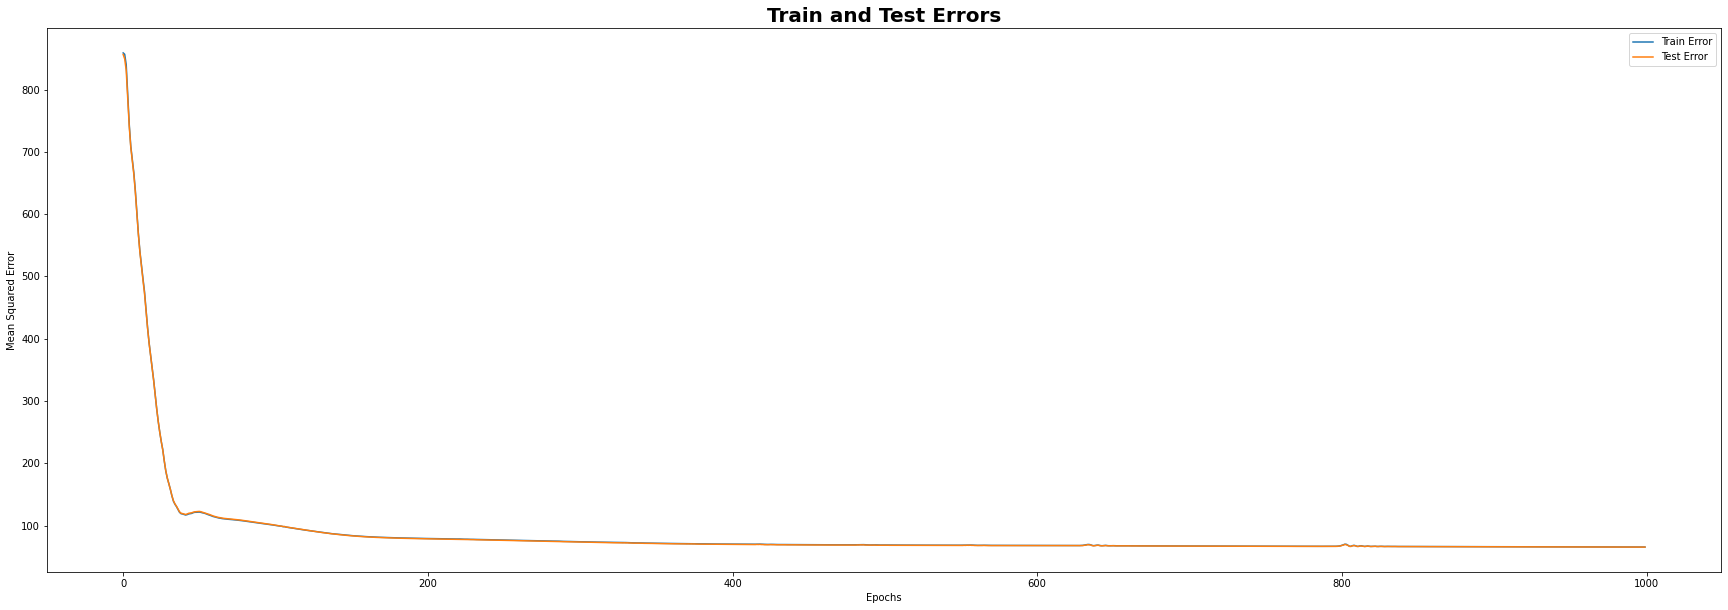

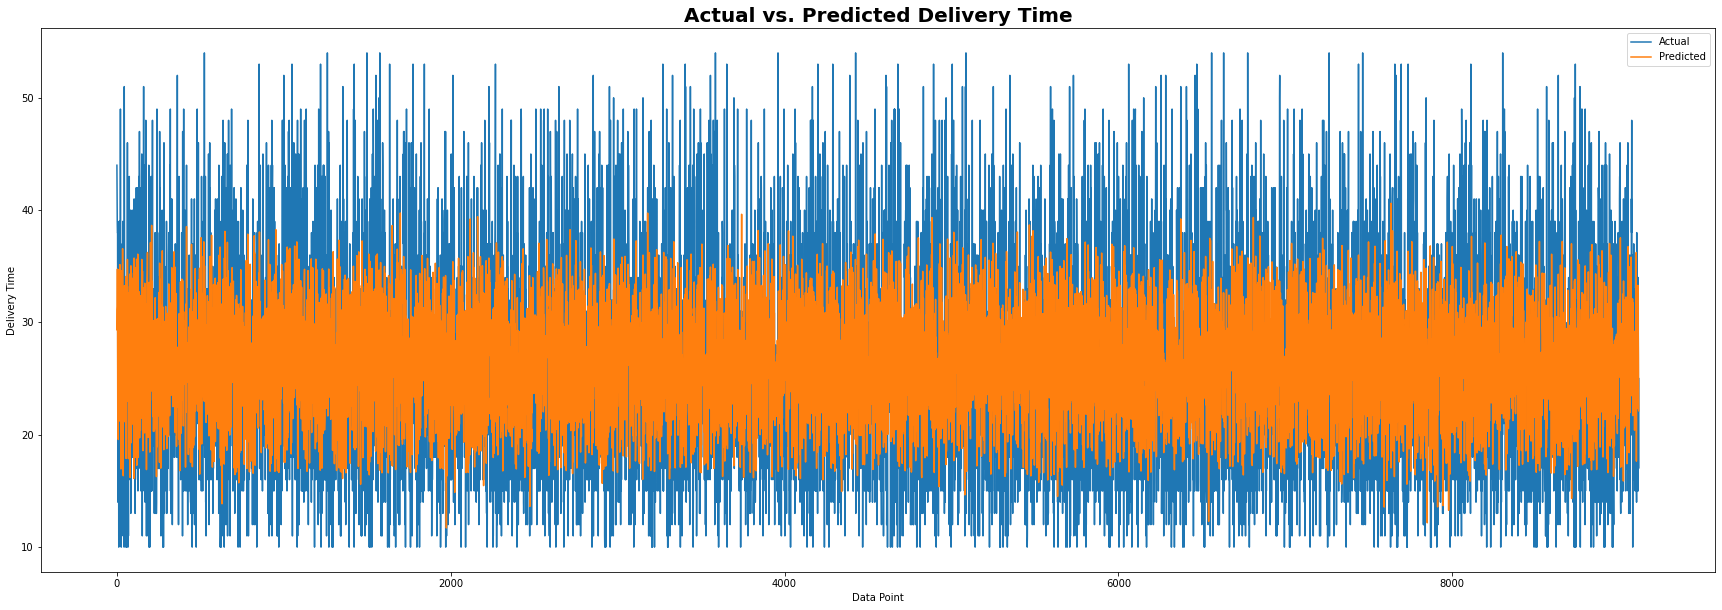

RMSE: 8.10933812829954


In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_squared_error

# Check if CUDA is available and use it if possible
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define the model architecture
class NeuralNetwork(nn.Module):
    def __init__(self, input_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Create an instance of the model
model = NeuralNetwork(input_size=X_train.shape[1]).to(device)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Convert the data to PyTorch tensors and move to the device
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32).to(device)

# Lists to store the training and testing errors
train_errors = []
test_errors = []

# Train the model with early stopping criterion
best_loss = float('inf')
patience = 50  # Number of epochs to wait for improvement
early_stop_counter = 0
num_epochs = 1000

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs.squeeze(), y_train_tensor)
    loss.backward()
    optimizer.step()

    # Calculate training error
    model.eval()
    with torch.no_grad():
        train_predictions = model(X_train_tensor).squeeze()
        train_error = mean_squared_error(y_train_tensor.cpu(), train_predictions.cpu())

    # Calculate testing error
    model.eval()
    with torch.no_grad():
        test_predictions = model(X_test_tensor).squeeze()
        test_error = mean_squared_error(y_test, test_predictions.cpu())

    # Record errors
    train_errors.append(train_error)
    test_errors.append(test_error)

    # Check early stopping criterion
    if test_error < best_loss:
        best_loss = test_error
        early_stop_counter = 0
    else:
        early_stop_counter += 1
        if early_stop_counter >= patience:
            print(f'Early stopping at epoch {epoch} due to no improvement.')
            break

# Calculate RMSE
rmse = np.sqrt(test_errors[-1])

# Plot train and test errors
num_data_points = len(train_errors)
fig_size = (20, 10) if num_data_points <= 100 else (30, 10) if num_data_points <= 1000 else (40, 10)

plt.rcParams['figure.figsize'] = fig_size
plt.plot(range(len(train_errors)), train_errors, label='Train Error')
plt.plot(range(len(test_errors)), test_errors, label='Test Error')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.title('Train and Test Errors', fontsize=20, weight='bold')
plt.show()

# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    y_pred_tensor = model(X_test_tensor)
    y_pred = y_pred_tensor.squeeze().cpu().numpy()

# Plot y_test and y_pred values

# Set the percentage of data points to plot
plot_percentage = 1.0

# Calculate the number of data points to plot
num_points = int(len(y_test) * plot_percentage)

# Generate indices for the sampled data points
indices = range(num_points)

# Plot y_test and y_pred values for the sampled data points
fig, ax = plt.subplots()
ax.plot(indices, y_test[:num_points], label='Actual')
ax.plot(indices, y_pred[:num_points], label='Predicted')
ax.set_xlabel('Data Point')
ax.set_ylabel('Delivery Time')
ax.set_title('Actual vs. Predicted Delivery Time', fontsize=20, weight='bold')
ax.legend()
plt.show()


print("RMSE:", rmse)

* After training the model and evaluating it, we get a low RMSE of 8.
    - However, since the model still makes false predictions quite a lot and there is no uncertainty quantification
    - This makes the model less useful for decision making and, if it were deployed on an e-commerce platform, less reliably informative to customers
    - This is the problem we will attempt to solve with Conformalized Quantile Regression

***** Training model with Conformalized Quantile Regression *****

In [11]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from lightgbm import LGBMRegressor
from matplotlib.offsetbox import AnnotationBbox, TextArea
from matplotlib.ticker import FormatStrFormatter
from scipy.stats import randint, uniform
from sklearn.model_selection import KFold, RandomizedSearchCV, train_test_split

from mapie.metrics import (regression_coverage_score,
                           regression_mean_width_score)
from mapie.quantile_regression import MapieQuantileRegressor, MapieRegressor
from mapie.subsample import Subsample

random_state = 23
rng = np.random.default_rng(random_state)
round_to = 3

warnings.filterwarnings("ignore")

* We start by splitting our Training set into a training set and calibration set using a 50/50 split

In [12]:
X_train, X_calib, y_train, y_calib = train_test_split(X_train, y_train, random_state=random_state)

## 2. Optimizing estimator
Before estimating uncertainties, let's start by optimizing the base model
in order to reduce our prediction error. We will use the
:class:`~lightgbm.LGBMRegressor` in the quantile setting. The optimization
is performed using :class:`~sklearn.model_selection.RandomizedSearchCV`
to find the optimal model to predict the house prices.



In [13]:
estimator = LGBMRegressor(
    objective='quantile',
    alpha=0.5,
    random_state=random_state
)
params_distributions = dict(
    num_leaves=randint(low=10, high=50),
    max_depth=randint(low=3, high=20),
    n_estimators=randint(low=50, high=300),
    learning_rate=uniform()
)
optim_model = RandomizedSearchCV(
    estimator,
    param_distributions=params_distributions,
    n_jobs=-1,
    n_iter=100,
    cv=KFold(n_splits=5, shuffle=True),
    verbose=-1
)
optim_model.fit(X_train, y_train)
estimator = optim_model.best_estimator_

## 3. Comparison of MAPIE methods
We will now proceed to compare the different methods available in MAPIE used
for uncertainty quantification on regression settings. For this tutorial we
will compare the "naive", "Jackknife plus after Bootstrap", "cv plus" and
"conformalized quantile regression". Please have a look at the theoretical
description of the documentation for more details on these methods.

We also create two functions, one to sort the dataset in increasing values
of ``y_test`` and a plotting function, so that we can plot all predictions
and prediction intervals for different conformal methods.



In [14]:
def sort_y_values(y_test, y_pred, y_pis):
    """
    Sorting the dataset in order to make plots using the fill_between function.
    """
    indices = np.argsort(y_test)
    y_test_sorted = np.array(y_test)[indices]
    y_pred_sorted = y_pred[indices]
    y_lower_bound = y_pis[:, 0, 0][indices]
    y_upper_bound = y_pis[:, 1, 0][indices]
    return y_test_sorted, y_pred_sorted, y_lower_bound, y_upper_bound


def plot_prediction_intervals(
    title,
    axs,
    y_test_sorted,
    y_pred_sorted,
    lower_bound,
    upper_bound,
    coverage,
    width,
    num_plots_idx
):
    """
    Plot of the prediction intervals for each different conformal
    method.
    """
    axs.yaxis.set_major_formatter(FormatStrFormatter('%.0f' + "k"))
    axs.xaxis.set_major_formatter(FormatStrFormatter('%.0f' + "k"))

    lower_bound_ = np.take(lower_bound, num_plots_idx)
    y_pred_sorted_ = np.take(y_pred_sorted, num_plots_idx)
    y_test_sorted_ = np.take(y_test_sorted, num_plots_idx)

    error = y_pred_sorted_-lower_bound_

    warning1 = y_test_sorted_ > y_pred_sorted_+error
    warning2 = y_test_sorted_ < y_pred_sorted_-error
    warnings = warning1 + warning2
    axs.errorbar(
        y_test_sorted_[~warnings],
        y_pred_sorted_[~warnings],
        yerr=error[~warnings],
        capsize=5, marker="o", elinewidth=2, linewidth=0,
        label="Inside prediction interval"
        )
    axs.errorbar(
        y_test_sorted_[warnings],
        y_pred_sorted_[warnings],
        yerr=error[warnings],
        capsize=5, marker="o", elinewidth=2, linewidth=0, color="red",
        label="Outside prediction interval"
        )
    axs.scatter(
        y_test_sorted_[warnings],
        y_test_sorted_[warnings],
        marker="*", color="green",
        label="True value"
    )
    axs.set_xlabel("True house prices in $")
    axs.set_ylabel("Prediction of house prices in $")
    ab = AnnotationBbox(
        TextArea(
            f"Coverage: {np.round(coverage, round_to)}\n"
            + f"Interval width: {np.round(width, round_to)}"
        ),
        xy=(np.min(y_test_sorted_)*3, np.max(y_pred_sorted_+error)*0.95),
        )
    lims = [
        np.min([axs.get_xlim(), axs.get_ylim()]),  # min of both axes
        np.max([axs.get_xlim(), axs.get_ylim()]),  # max of both axes
    ]
    axs.plot(lims, lims, '--', alpha=0.75, color="black", label="x=y")
    axs.add_artist(ab)
    axs.set_title(title, fontweight='bold')

We proceed to using MAPIE to return the predictions and prediction intervals.
We will use an $\alpha=0.2$, this means a target coverage of 0.8
(recall that this parameter needs to be initialized directly when setting
:class:`~mapie.quantile_regression.MapieQuantileRegressor` and when using
:class:`~mapie.regression.MapieRegressor`, it needs to be set in the
``predict``).
Note that for the CQR, there are two options for ``cv``:

* ``cv="split"`` (by default), the split-conformal where MAPIE trains the
  model on a training set and then calibrates on the calibration set.
* ``cv="prefit"`` meaning that you can train your models with the correct
  quantile values (must be given in the following order:
  $(\alpha, 1-(\alpha/2), 0.5)$ and given to MAPIE as an iterable
  object. (Check the examples for how to use prefit in MAPIE)

Additionally, note that there is a list of accepted models by
:class:`~mapie.quantile_regression.MapieQuantileRegressor`
(``quantile_estimator_params``) and that we will use symmetrical residuals.



In [15]:
STRATEGIES = {
    "cqr": {"method": "quantile", "cv": "split", "alpha": 0.1}
}
y_pred, y_pis = {}, {}
y_test_sorted, y_pred_sorted, lower_bound, upper_bound = {}, {}, {}, {}
coverage, width = {}, {}
for strategy, params in STRATEGIES.items():
    if strategy == "cqr":
        mapie = MapieQuantileRegressor(estimator, **params)
        mapie.fit(X_train, y_train, X_calib=X_calib, y_calib=y_calib)
        y_pred[strategy], y_pis[strategy] = mapie.predict(X_test)
    else:
        mapie = MapieRegressor(estimator, **params)
        mapie.fit(X_train, y_train)
        y_pred[strategy], y_pis[strategy] = mapie.predict(X_test, alpha=0.2)
    (
        y_test_sorted[strategy],
        y_pred_sorted[strategy],
        lower_bound[strategy],
        upper_bound[strategy]
    ) = sort_y_values(y_test, y_pred[strategy], y_pis[strategy])
    coverage[strategy] = regression_coverage_score(
        y_test,
        y_pis[strategy][:, 0, 0],
        y_pis[strategy][:, 1, 0]
        )
    width[strategy] = regression_mean_width_score(
        y_pis[strategy][:, 0, 0],
        y_pis[strategy][:, 1, 0]
        )

In [16]:
lower_bound = y_pis['cqr'][:, 0, 0]  # Extract lower bound values
upper_bound = y_pis['cqr'][:, 1, 0]  # Extract upper bound values

# Create DataFrame
df = pd.DataFrame({'Lower Bound': lower_bound, 'Upper Bound': upper_bound, 'Y_pred': y_pred['cqr']})



ytest_reset = y_test.reset_index(drop=True)  # Reset the index of df2 and drop the old index

results_df = pd.concat([df, ytest_reset], axis=1)

results_df

,Lower Bound,Upper Bound,Y_pred,Time_taken(min)
0,17.725759,49.408512,31.433908,44
1,17.853191,49.328596,29.782871,41
2,30.667879,43.873013,35.964160,39
3,17.488744,49.099778,30.170215,38
4,14.206153,41.950934,23.895926,38
...,...,...,...,...
9114,10.755725,32.254920,21.303834,15
9115,15.985100,38.324879,26.005699,34
9116,11.226430,38.446371,21.783896,21
9117,10.492009,32.982823,19.990762,17


In [17]:
# create new column to show if the actual value is within the prediction interval
results_df['Within_Prediction_Interval'] = np.where((results_df['Time_taken(min)'] >= results_df['Lower Bound']) & (results_df['Time_taken(min)'] <= results_df['Upper Bound']), 'within', 'outside')

# create new column to show size of prediction interval
results_df['Prediction_Interval_Size'] = results_df['Upper Bound'] - results_df['Lower Bound']

# calculating percentage of actual values within prediction interval
percentage_within_interval = (results_df[results_df['Within_Prediction_Interval'] == "within"].shape[0] / len(results_df)) * 100
print('Percentage of actual values within prediction interval: {:.2f}%'.format(percentage_within_interval))


Percentage of actual values within prediction interval: 90.31%


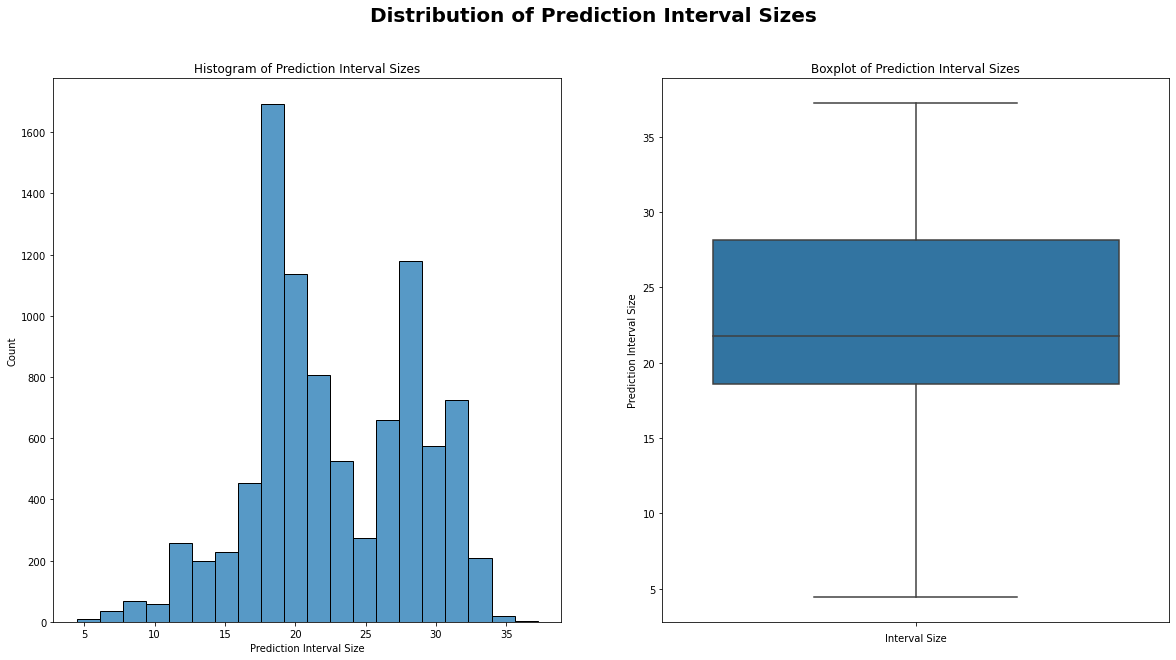

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Task 1: Plot histogram using sns
sns.histplot(data=results_df, x='Prediction_Interval_Size', bins=20, ax=ax[0])
ax[0].set_xlabel('Prediction Interval Size')
ax[0].set_ylabel('Count')
ax[0].set_title('Histogram of Prediction Interval Sizes')

# Task 2: Plot boxplot using sns
sns.boxplot(data=results_df, y='Prediction_Interval_Size', ax=ax[1])
ax[1].set_xlabel('Interval Size')
ax[1].set_ylabel('Prediction Interval Size')
ax[1].set_title('Boxplot of Prediction Interval Sizes')

# Add overall title
fig.suptitle('Distribution of Prediction Interval Sizes', fontsize=20, weight='bold')

plt.show()


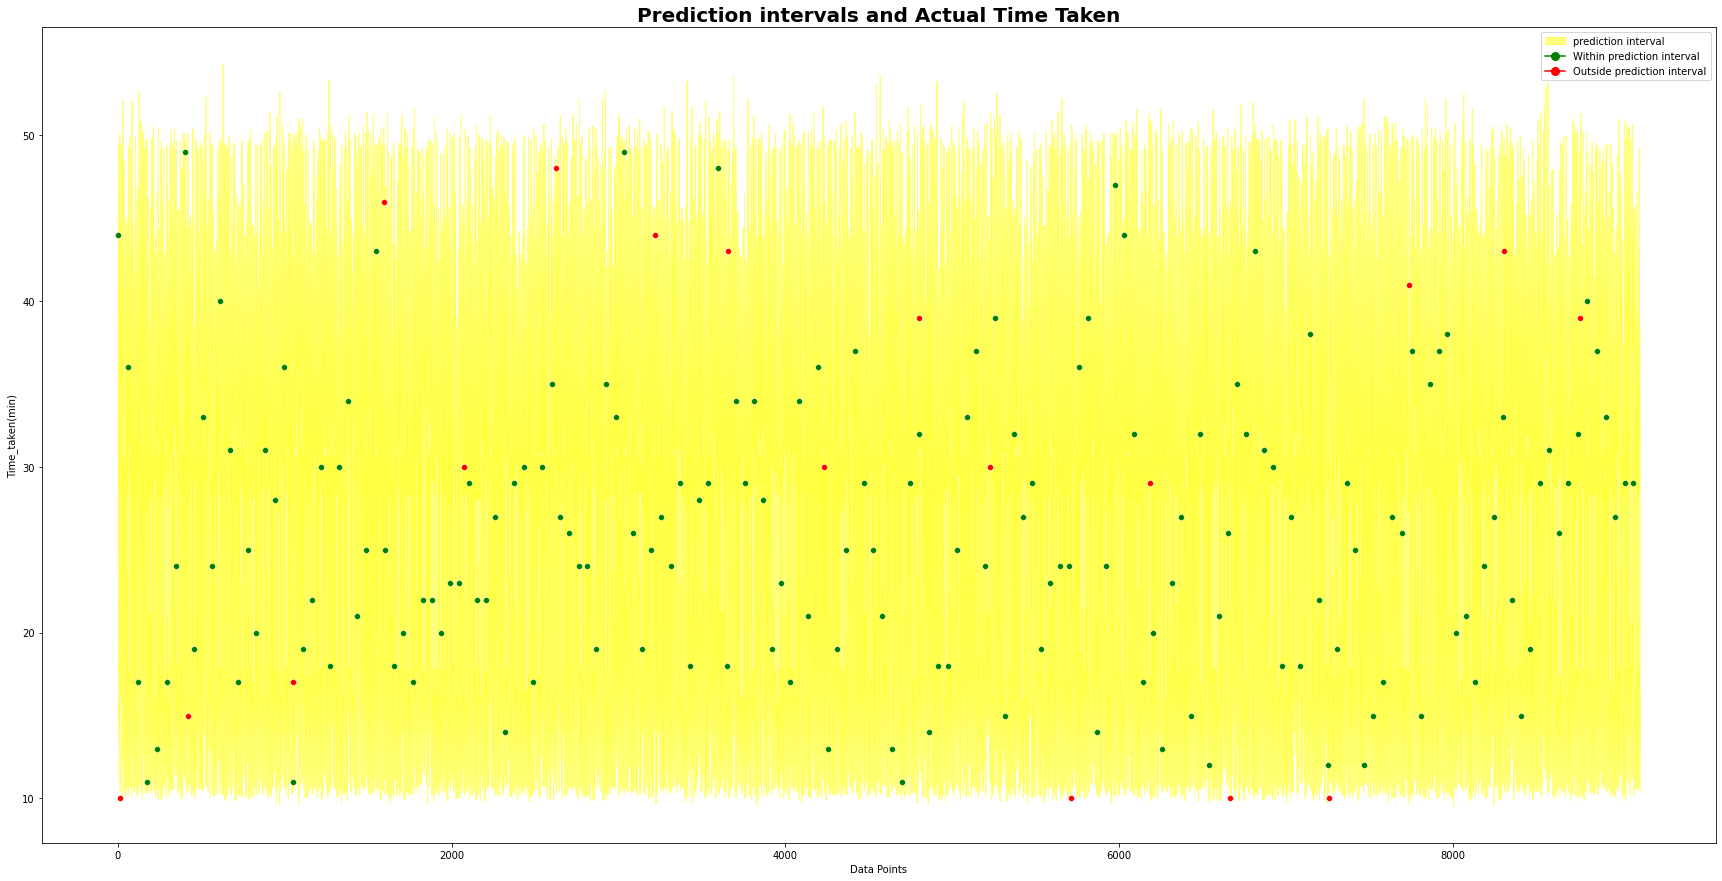

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# percentage of data points to plot
percentage_to_plot = 0.02 

# set figure size
plt.figure(figsize=(30, 15))

# Plot prediction interval with yellow fill color
plt.fill_between(results_df.index, results_df['Lower Bound'], results_df['Upper Bound'], color='yellow', alpha=0.5)

# Plot time taken dots
within_interval = results_df['Within_Prediction_Interval'] == 'within'
sns.scatterplot(data=results_df[within_interval][::int(1/percentage_to_plot)], x=results_df.index[within_interval][::int(1/percentage_to_plot)], y='Time_taken(min)', color='green')
sns.scatterplot(data=results_df[~within_interval][::int(1/percentage_to_plot)], x=results_df.index[~within_interval][::int(1/percentage_to_plot)], y='Time_taken(min)', color='red')

# Add legend
plt.legend(handles=[plt.Rectangle((0,0),1,1, color='yellow', alpha=0.5, label='prediction interval'), plt.Line2D([0], [0], marker='o', color='green', label='Within prediction interval', markerfacecolor='green', markersize=8), plt.Line2D([0], [0], marker='o', color='red', label='Outside prediction interval', markerfacecolor='red', markersize=8)])

plt.xlabel('Data Points')
plt.ylabel('Time_taken(min)')
plt.title('Prediction intervals and Actual Time Taken', fontsize=20, weight='bold')
plt.show()
